In [1]:
from gensim import corpora,  models
from gensim.models import CoherenceModel
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
from propiostopwords import stopWords

from nltk.stem import WordNetLemmatizer
from string import punctuation
import emoji
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import spacy

In [4]:
nombreHashtag="#arequipa"
nombreArchivo="ArequipaWordcloud.csv"
#lenguajeStopword=stopwords.words('english')
lenguajeStopword=stopWords()

tweets=pd.read_csv(nombreArchivo,lineterminator='\n')
tweets.head()

,tweetFiltrado
0,hermanito menor pedro #peru requiere ingresos ...
1,abandonan fuerza popular partido señora keiko ...
2,seguimos poniendo hombro lucha covid #buenaven...
3,#urgente nosocomios colapsados no hay personal...
4,#marchanov quinto día consecutivo ciudadanos s...


In [6]:
corpus=tweets['tweetFiltrado'].to_list()
#palabrasEvitar=['amp','covid','0','1','2','3','4','5','6','7','8','9']
palabrasEvitar=['rt', 'via', 'amp', 'http', 'https', 'm', 're', 'co',nombreHashtag,nombreHashtag[1:]]
list_punctuation=list(punctuation)+['¿','¡']
list_punctuation.remove('@')
#list_punctuation.remove('#')
listaStopwords=lenguajeStopword+palabrasEvitar
lemmatizer = WordNetLemmatizer()
#nlp = spacy.load('es_core_news_sm')

#minusculas
corpus=[ str(document).lower() for document in corpus]

#urls
corpus=[re.sub('http[s]?://\S+', '', word) for word in corpus]

#emojis
corpus=[emoji.get_emoji_regexp().sub(u'', word) for word in corpus]

#punctuacion
corpus=[word.translate(str.maketrans('','', ''.join(list_punctuation))) for word in corpus]
#numeros y tamanio palabras
corpus=[re.sub('[0-9]+', '', word) for word in corpus]
corpus=[word for word in corpus if len(str(word))>2]

#tokenizar y lemmatizar
#texts=[[lemmatizer.lemmatize(word) for word in str(document).split() if word not in listaStopwords] for document in corpus]
texts=[[word for word in str(document).split() if word not in listaStopwords] for document in corpus]
#texts=[[nlp(word) for word in str(document).split() if word not in listaStopwords] for document in corpus]
#texts=[[nlp(document) ] for document in corpus]

print(texts[0:5])

[['hermanito', 'menor', 'pedro', 'peru', 'requiere', 'ingresos', 'sobrevivir', 'pandemia', 'inmigrantes', 'diseñador', 'gráfico', 'barbero', 'cocina', 'limpia', 'cuida', 'mascotas', 'ayúdame', 'ayudarlo', 'alguien', 'seguro', 'requerie', 'servicios'], ['abandonan', 'fuerza', 'popular', 'partido', 'señora', 'keiko', 'fujimori', 'asistieron', 'votar', 'delegado', 'elecciones', 'descentralizadas', 'tendrán', 'postulantes', 'congreso', 'ciudad', 'blanca'], ['poniendo', 'hombro', 'lucha', 'covid', 'buenaventura', 'entregó', 'hoy', 'tres', 'grupos', 'electrógenos', 'hospital', 'iii', 'yanahuara', 'asegurar', 'energía', 'necesaria', 'atener', 'pacientes', 'afectados', 'pandemia'], ['urgente', 'nosocomios', 'colapsados', 'hay', 'personal', 'médico', 'quedan', 'contagiando', 'falta', 'epps', 'hoy', 'hay', 'cadáveres', 'pasillos', 'honorio', 'delgado', 'área', 'autopsia', 'tope', 'atienda', 'pueblo', 'pdte', '@martinvizcarrac', 'hilo'], ['marchanov', 'quinto', 'día', 'consecutivo', 'ciudadanos',

# LDA

In [7]:
corpus=tweets['tweetFiltrado'].to_list()
texts=[[word for word in str(document).split()] for document in corpus]

dictionary=corpora.Dictionary(texts)
corpus=[dictionary.doc2bow(text) for text in texts]
print(dictionary)

Dictionary(39983 unique tokens: ['#peru', 'alguien', 'ayudarlo', 'ayúdame', 'barbero']...)


In [8]:
coherence_values=[]
model_list=[]
for num_topics in range(2,11,1):
    model=lda=models.LdaModel(corpus,id2word=dictionary,num_topics=num_topics, random_state=100 ,alpha='auto', eval_every=5)
    model_list.append(model)
    coherencemodel=CoherenceModel(model=model, texts=texts,dictionary=dictionary,coherence='c_v')
    print(coherencemodel.get_coherence())
    coherence_values.append(coherencemodel.get_coherence())

0.35883270023723024
0.319419557874111
0.2815788447559637
0.3311136892645384
0.3481229512029494
0.3536727313482035
0.3632224136764006
0.36641865884704106
0.38372507859037397


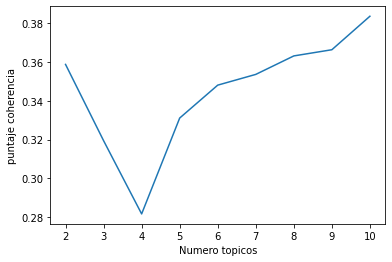

In [9]:
x=range(2,11,1)
plt.plot(x,coherence_values)
plt.xlabel("Numero topicos")
plt.ylabel("puntaje coherencia")
plt.show()

In [13]:
topicos_dictionary=dict(zip(x,coherence_values))
max_coherence=max(topicos_dictionary,key=topicos_dictionary.get)
cantidadTopicos=max_coherence

lda=models.LdaModel(corpus,id2word=dictionary,num_topics=cantidadTopicos, random_state=100 ,alpha='auto', eval_every=5)
lda.show_topics(cantidadTopicos,20)

[(0,
  '0.031*"covid" + 0.026*"gestantes" + 0.023*"regional" + 0.019*"#covid" + 0.018*"hospital" + 0.017*"gobernador" + 0.014*"gobierno" + 0.014*"salud" + 0.011*"delgado" + 0.010*"honorio" + 0.009*"presidente" + 0.009*"cáceres" + 0.009*"llica" + 0.008*"elmer" + 0.008*"ii" + 0.007*"no" + 0.007*"médicos" + 0.007*"personal" + 0.006*"pandemia" + 0.005*"pacientes"'),
 (1,
  '0.035*"infórmate" + 0.021*"#atvnoticias" + 0.014*"facebook" + 0.007*"distrito" + 0.007*"hoy" + 0.006*"policía" + 0.006*"no" + 0.006*"tienda" + 0.005*"plaza" + 0.005*"personas" + 0.005*"altas" + 0.005*"años" + 0.004*"calles" + 0.004*"cercado" + 0.004*"san" + 0.004*"perú" + 0.004*"seguridad" + 0.004*"@policiaperu" + 0.004*"vida" + 0.004*"calle"'),
 (2,
  '0.026*"infórmate" + 0.025*"no" + 0.018*"provincia" + 0.010*"whatsapp" + 0.009*"agosto" + 0.009*"servicio" + 0.008*"zonas" + 0.008*"algunas" + 0.006*"#corteprogramado" + 0.006*"#covid" + 0.006*"si" + 0.006*"instagram" + 0.006*"calidad" + 0.006*"cerro" + 0.006*"colorado" +

# Wordcloud

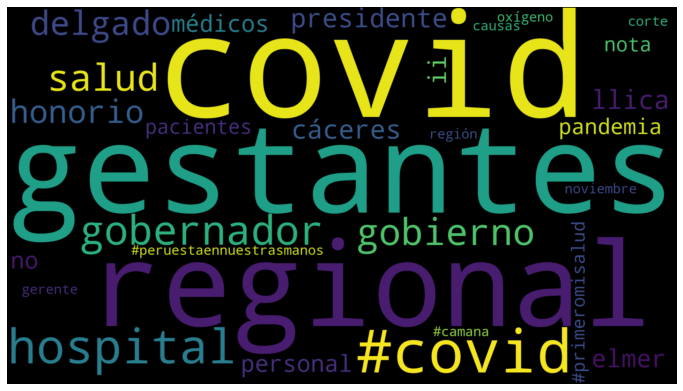

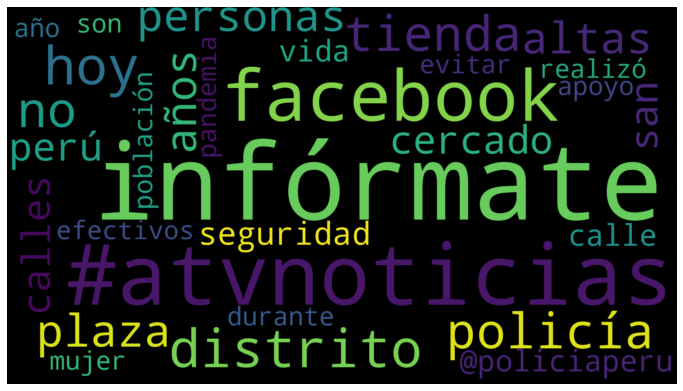

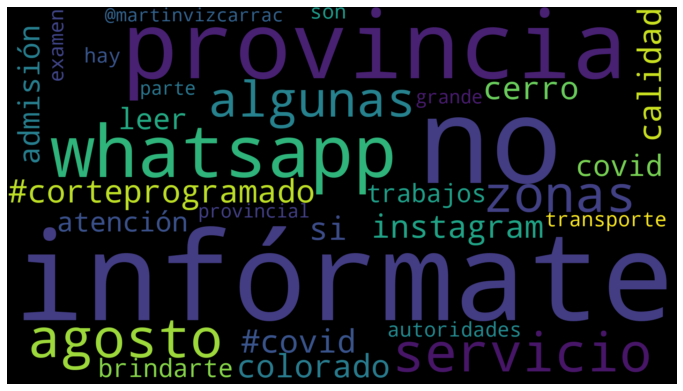

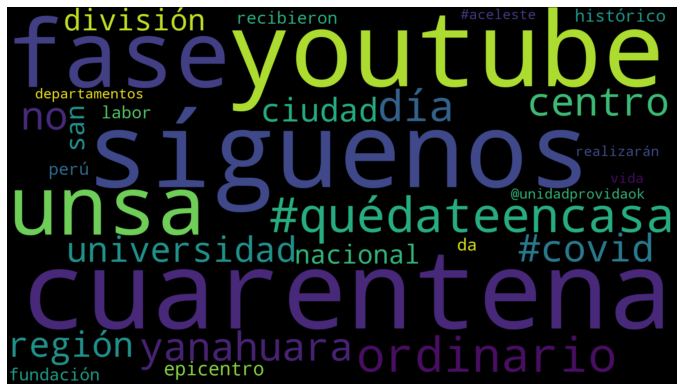

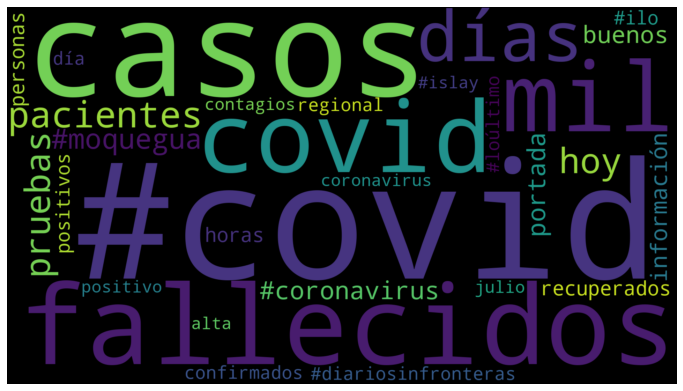

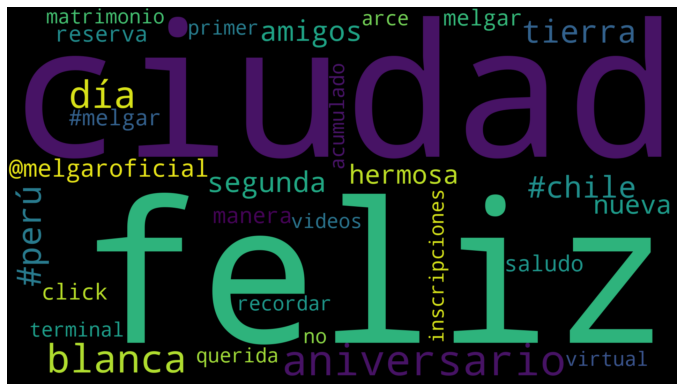

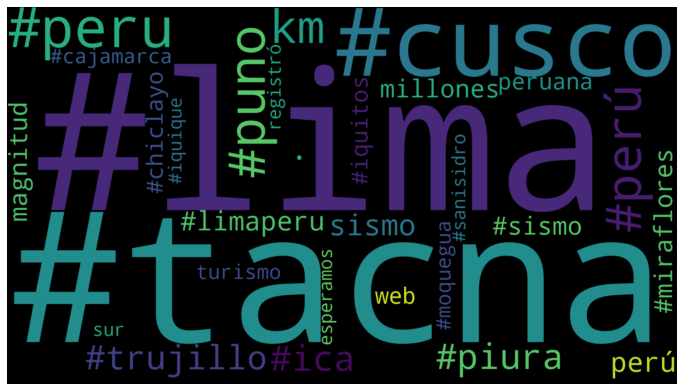

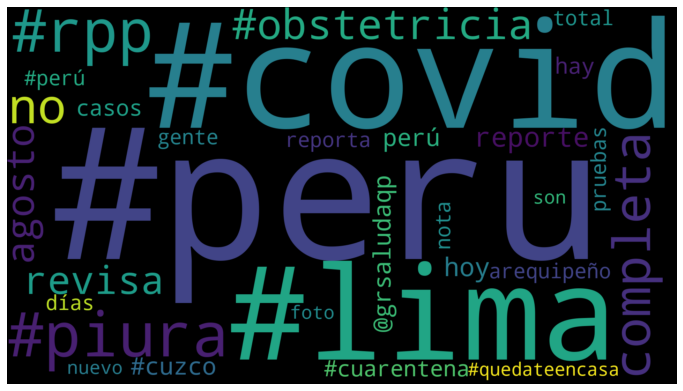

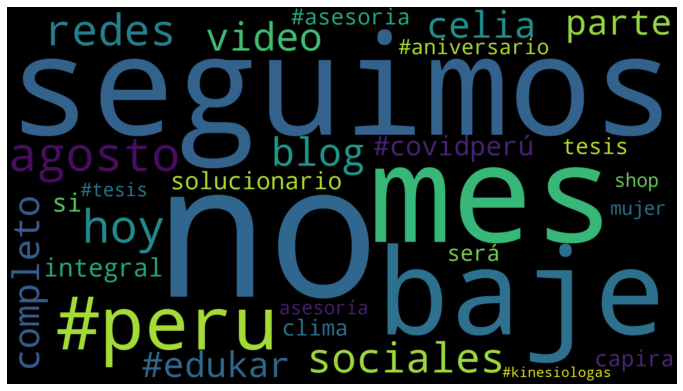

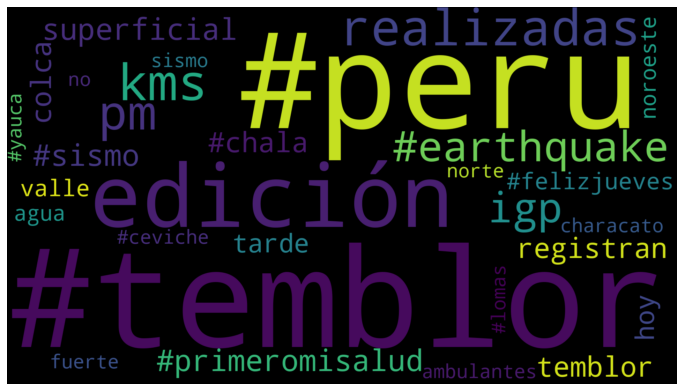

In [16]:
curr_topic = 0
for l in lda.print_topics(cantidadTopicos,num_words=30):
    line = l[1]
    scores = [float(x.split("*")[0]) for x in line.split(" + ")]
    words = [re.sub('\"', '', x.split("*")[1]) for x in line.split(" + ")]
    freqs = []

    freqs=dict(zip(words, scores))
    elements = WordCloud(width=1920, height=1080).generate_from_frequencies(freqs)


    plt.rcParams['figure.figsize'] = 12, 8
    plt.imshow(elements, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    curr_topic += 1

In [15]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
lda_viz = gensimvis.prepare(lda, corpus, dictionary)
lda_viz

/home/oem/.local/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.127562 -0.070460       1        1  15.833396
1      0.083616 -0.108061       2        1  13.812155
0      0.143409  0.041635       3        1  11.060236
4      0.155544  0.215992       4        1  10.943150
7     -0.019886  0.139755       5        1  10.389960
6     -0.269022  0.128316       6        1  10.048220
8     -0.048232 -0.157304       7        1   7.904260
9     -0.118065 -0.000759       8        1   7.186820
3      0.045616 -0.074816       9        1   7.066387
5     -0.100541 -0.114298      10        1   5.755416, topic_info=           Term         Freq        Total Category  logprob  loglift
152      #covid  4495.000000  4495.000000  Default  30.0000  30.0000
0         #peru  3170.000000  3170.000000  Default  29.0000  29.0000
344       #lima  1907.000000  1907.000000  Default  28.0000  28.0000
4035  infórmate  3138.000000  3138.000000  Default  27.0000  27.0000
285       casos  1434.000000  1434.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
733       #perú   193.670586  1224.247324  Topic10  -4.5664   1.0111
2202     manera    84.487023   169.084258  Topic10  -5.3959   2.1612
1234     primer    81.516265   191.318443  Topic10  -5.4317   2.0019
843     virtual    70.799630   234.180192  Topic10  -5.5727   1.6588
33           no    70.675040  3423.421700  Topic10  -5.5744  -1.0253

[637 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
2191       2  0.850223          #
2191       4  0.007591          #
2191       7  0.007591          #
2191       9  0.129052          #
1901       2  0.011854  #aceleste
...      ...       ...        ...
2817       3  0.033647    últimas
2817       4  0.958944    últimas
2817       9  0.004206    últimas
11536      7  0.988501          —
17133      6  0.994087          •

[1724 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1, 5, 8, 7, 9, 10, 4, 6])